# Boston Housing Price Prediction Workbook

Tyler Amos

MACSS 30200

In [13]:
from keras import models
from keras import layers
import pandas as pd
import random
random.seed(1234)
import numpy as np

import matplotlib.pyplot as plt
from keras import regularizers

from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [14]:
def import_normalize():
    from keras.datasets import boston_housing
    (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    train_data /= std

    test_data -= mean
    test_data /= std
    return train_data, train_targets, test_data, test_targets
    

# Set up the necessary functions

In [50]:
# k fold cross validation
def kfold_valid(model_func, k = 4, num_epochs = 10, batch = 1):
    
    train_data, train_targets, test_data, test_targets = import_normalize()
    num_val_samples = len(train_data) // k
    all_mae_histories = []
    all_mse_histories = []
    
    for i in range(k):
        print('processing fold #', i)
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
             train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
             train_targets[(i + 1) * num_val_samples:]],
            axis=0)

        model = model_func()
        history = model.fit(partial_train_data, partial_train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=batch, verbose=0)
        mae_history = history.history['val_mean_absolute_error']
        all_mae_histories.append(mae_history)
    return all_mae_histories, all_mse_histories, test_data, test_targets, model

def plot_av_mae(all_mae_histories, num_epochs):
    average_mae_history = [
        np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    
def evaluate_on_test(test_data, test_targets, model):
    test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
    print("TEST MSE {}".format(test_mse_score))
    print("TEST MAE {}".format(test_mae_score))
    
def run_trial(model, k, num_epochs, batch):
    scores_ab, scores_av, test_data, test_targets, model_train = kfold_valid(model, k, num_epochs, batch)
    plot_av_mae(scores_ab, num_epochs)
    evaluate_on_test(test_data, test_targets, model_train)
    

# Model 1, straight from the book, k = 4, epochs = 80

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


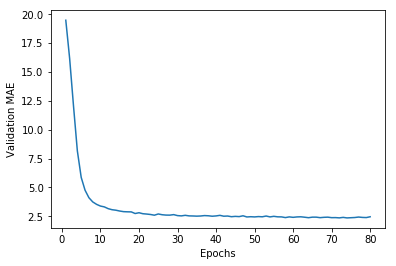

102/102 [==============================] - 0s 166us/step
TEST MSE 19.216416602041207
TEST MAE 2.8231960464926327


In [52]:

def build_model_1():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_1, 4, 80, 16)


# model 2, k = 10, epochs = 100

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


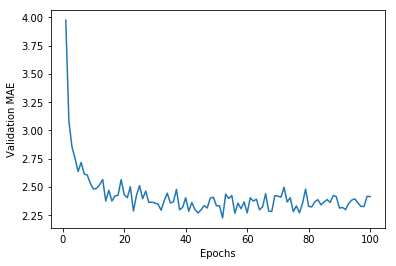

102/102 [==============================] - 2s 15ms/step
MSE IS 618.6642898858762
MAE IS 23.151497074201995


In [27]:
def build_model_2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_2, 10, 100)

# model 3, k = 10, epochs = 100, layer size = 80

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


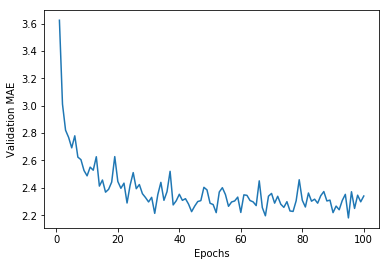

102/102 [==============================] - 1s 12ms/step
MSE IS 606.0668550379136
MAE IS 22.79875545875699


In [28]:
def build_model_3():
    model = models.Sequential()
    model.add(layers.Dense(80, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(80, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_3, 10, 100)

# model 4, k = 10, epochs = 100, layer size = 50, additional layer with size 25

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


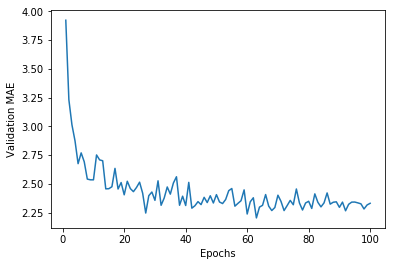

102/102 [==============================] - 0s 4ms/step
MSE IS 625.4645708869485
MAE IS 23.279330721088485


In [16]:
def build_model_4():
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(25, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_4, 10, 70, 12)

# model 5, k = 10, epochs = 100, layer size = 64, additional layer with size 10

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


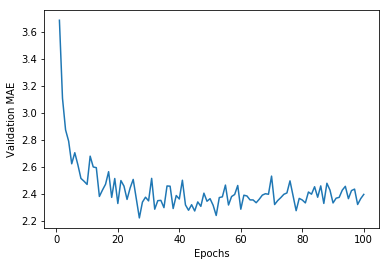

102/102 [==============================] - 1s 8ms/step
MSE IS 629.5640438304227
MAE IS 23.398361767039578


In [17]:
def build_model_5():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_5, 10, 50, 29)

# model 6, k = 10, epochs = 25, layer size = 64

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


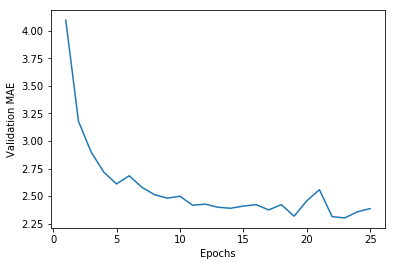

102/102 [==============================] - 1s 11ms/step
MSE IS 582.5244511623008
MAE IS 22.327713199690276


In [18]:
def build_model_6():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_6, 10, 25, 80)

# model 7, k = 10, epochs = 40, layer size = 100 and 64

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


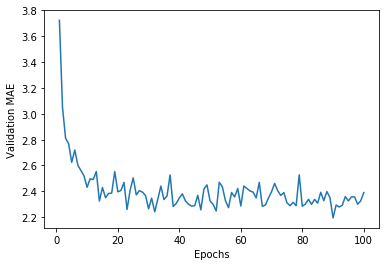

102/102 [==============================] - 2s 16ms/step
MSE IS 624.1446389590992
MAE IS 23.21953743579341


In [20]:
def build_model_7():
    model = models.Sequential()
    model.add(layers.Dense(100, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_7, 10, 40, 30)

# model 8, k = 10, epochs = 30, layer size = 120, one single layer

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


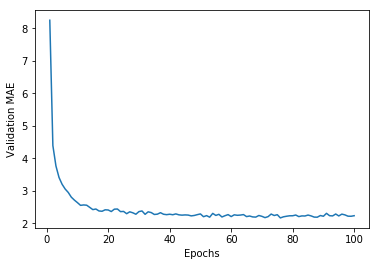

102/102 [==============================] - 2s 19ms/step
MSE IS 613.6765878714767
MAE IS 23.028982012879613


In [21]:
def build_model_8():
    model = models.Sequential()
    model.add(layers.Dense(120, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_8, 10, 30, 60)

# model 9, k = 10, epochs = 25, layer size = 300, one single layer

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


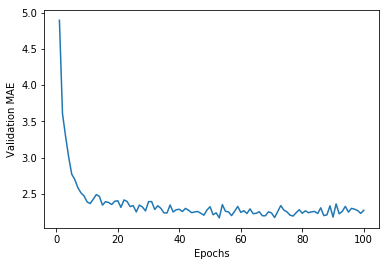

102/102 [==============================] - 2s 20ms/step
MSE IS 603.7142704982383
MAE IS 22.82991955327053


In [22]:
def build_model_9():
    model = models.Sequential()
    model.add(layers.Dense(300, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_9, 10, 25, 5)

# model 10, k = 10, epochs = 100, layer size = 25 and 25

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


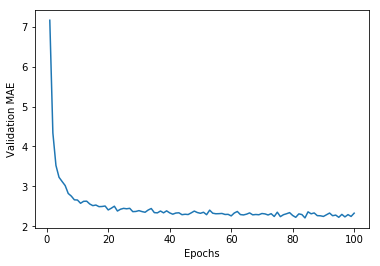

102/102 [==============================] - 2s 18ms/step
MSE IS 592.7350080901501
MAE IS 22.524528690412932


In [24]:
def build_model_10():
    model = models.Sequential()
    model.add(layers.Dense(25, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(25, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_10, 10, 25, 10)

# model 11, k = 10, epochs = 80, layer size = 70 and 70 with dropout at 20%

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


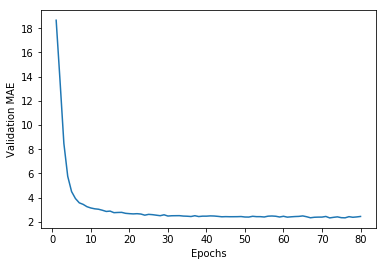

102/102 [==============================] - 0s 129us/step
TEST MSE 22.035761216107538
TEST MAE 3.1451469776677152


In [51]:
def build_model_11():
    model = models.Sequential()
    
    model.add(layers.Dense(70, activation='relu',
                           input_shape=(train_data.shape[1],)))
    
    model.add(layers.Dropout(0.2))
        
    model.add(layers.Dense(70, activation='relu',
                           input_shape=(train_data.shape[1],)))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

run_trial(build_model_11, 10, 80, 15)

# model 12, k = 10, epochs = 10, one layer of 200, batch size = 15

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


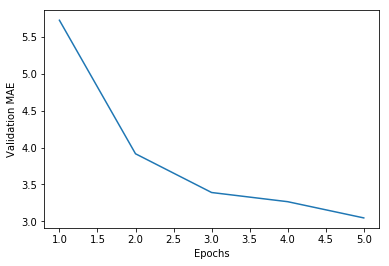

102/102 [==============================] - 3s 33ms/step
TEST MSE 609.629909141391
TEST MSE 22.97404124690037


In [45]:
def build_model_12():
    model = models.Sequential()
    model.add(layers.Dense(200, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

run_trial(build_model_12, 10, 10, 15)